

# Linear Regression with Keras

## PART D


The first step of this assignment consists of collecting data and processing it. For this to be implemented, let's import Pandas and numpy. 


In [1]:
#Import of the libraries

import pandas as pd
import numpy as np

#Data Collection
concrete_data = pd.read_csv('https://cocl.us/concrete_data')

#Display the first 5 rows of the dataset
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [2]:
concrete_data.tail()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


The first five rows of the data provides an overview of the of the data collected. The interest here lies on the definition of the predictors and the target after assessing the quality of the data.

In [3]:
#Description of the data 
concrete_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [4]:
#Evaluation of a possible correlation matrix between the features of the data
concrete_data.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [5]:
#Import of graphic libraries
import seaborn as sns
import matplotlib.pyplot as plt

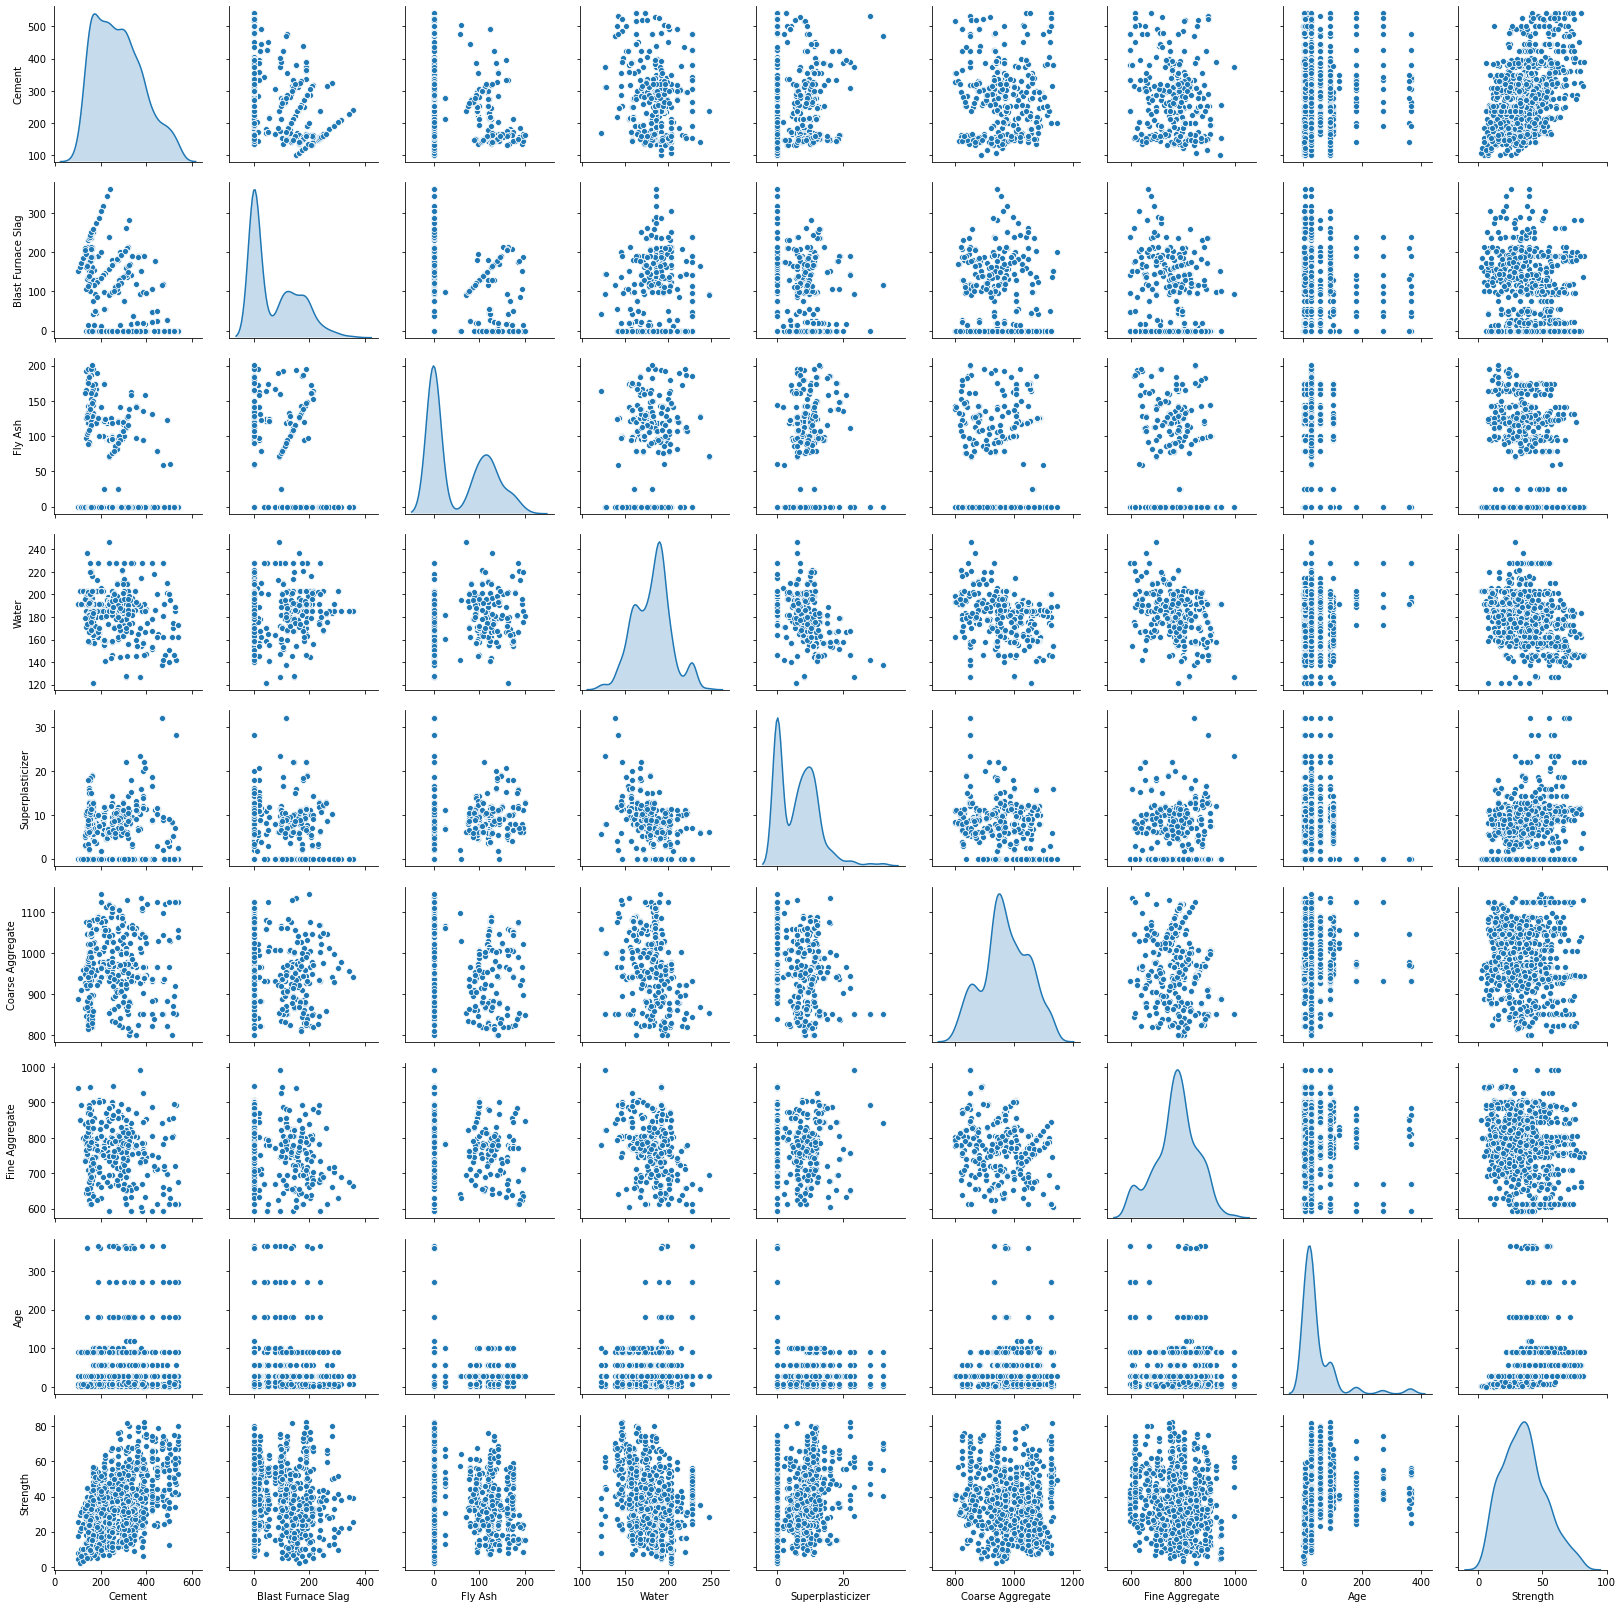

In [6]:
#plot of the correlation matrix between the features of the data
sns.pairplot(concrete_data, diag_kind='kde')

From the correlation chart and table, it can be observed that there is no significant correlation between independent variable and the target variable, which is the strength in this case. Therefore, for the remaining of this work, this correlation will be determined using a all the independent parameters also called predictors.

In [7]:
#To check if there are null values
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
#To check if there are missing values
concrete_data.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64



Now that we ensured that there are no missing values and that there is no significant correlation between independent features of the dataset, let's define the predictors and target of the data.

In [9]:
data_cols = concrete_data.columns

#Extraction of the predictors
predictors = concrete_data[data_cols[data_cols != "Strength"]]

#Extraction of the target
target = concrete_data["Strength"]
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


### Data normalization

In [10]:
#Data normalization using mean and standard deviation

predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [11]:
#First 5 rows of the target column
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [12]:
#Definition of the number bof columns
n_cols = predictors_norm.shape[1]
n_cols

8

In [13]:
#Import of Keras, on top of which the neural net will be built
import keras 

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

In [14]:
#import of Keras elements
from keras.models import Sequential
from keras.layers import Dense

In [15]:
#Definition of the model

def regression_model():
    #model creation
    model=Sequential()
    model.add(Dense(10, activation="relu", input_shape=(n_cols,)))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(1))
    
    #model compilation
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [16]:
#Model building
model =regression_model()

### Spliiting the data into training and test sets

In [17]:
#Data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=35)

In [18]:
#model fitting
model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
721/721 [==============================] - 1s 1ms/step - loss: 1539.7886
Epoch 2/50
721/721 [==============================] - 0s 549us/step - loss: 1523.3218
Epoch 3/50
721/721 [==============================] - 0s 553us/step - loss: 1500.4856
Epoch 4/50
721/721 [==============================] - 0s 579us/step - loss: 1458.9280
Epoch 5/50
721/721 [==============================] - 0s 588us/step - loss: 1382.9204
Epoch 6/50
721/721 [==============================] - 0s 577us/step - loss: 1252.2101
Epoch 7/50
721/721 [==============================] - 0s 526us/step - loss: 1057.5110
Epoch 8/50
721/721 [==============================] - 0s 474us/step - loss: 811.5601
Epoch 9/50
721/721 [==============================] - 0s 501us/step - loss: 554.3287
Epoch 10/50
721/721 [==============================] - 0s 477us/step - loss: 361.1613
Epoch 11/50
721/721 [==============================] - 0s 531us/step - loss: 265.7243
Epoch 12/50
721/721 [==============================] - 0s 

### Model Evaluation

In [19]:
#Evaluation of the model on the test_data
loss_val = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
loss_val

309/309 [==============================] - 0s 425us/step


142.15777652086177

### Report of the mean and standard devaition of the MSE

In [20]:
#Let's evaluate the difference betwwen the MSE of the actual and predicted target
from sklearn.metrics import mean_squared_error

mean_square_error = mean_squared_error(y_test, y_pred)
mean = np.mean(mean_square_error)
standard_deviation = np.std(mean_square_error)
print(mean, standard_deviation)

142.15777890511697 0.0


### Creation of list of 100 MSE and report of the mean and standard deviation of the MSE

In [21]:
total_mean_squared_errors = 50
epochs = 50
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictors_norm, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

mean_squared_errors = np.array(mean_squared_errors)
mean = np.mean(mean_squared_errors)
standard_deviation = np.std(mean_squared_errors)

print('\n')
print("Below is the mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors without normalized data. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean))
print("Standard Deviation: "+str(standard_deviation))

MSE 1: 94.70860841127661
MSE 2: 113.97464557141548
MSE 3: 100.01444797454143
MSE 4: 109.2114011894152
MSE 5: 84.23403831901673
MSE 6: 67.8294669216119
MSE 7: 56.1361321261014
MSE 8: 45.607840454694134
MSE 9: 42.43353414689839
MSE 10: 46.8083346962543
MSE 11: 42.00478832158456
MSE 12: 33.99062135072973
MSE 13: 44.18988792641649
MSE 14: 39.34831520500307
MSE 15: 32.59993488966069
MSE 16: 31.015986661694967
MSE 17: 34.31235681305426
MSE 18: 32.62629020098343
MSE 19: 31.552764090133717
MSE 20: 34.949583602954654
MSE 21: 29.877426159806237
MSE 22: 31.34613942019762
MSE 23: 27.306155911541293
MSE 24: 30.1395193303673
MSE 25: 30.80148800599922
MSE 26: 30.830346314266663
MSE 27: 29.702566609799284
MSE 28: 28.87544912196286
MSE 29: 30.78300676068056
MSE 30: 28.628202882785242
MSE 31: 25.437921295659827
MSE 32: 24.935027816920606
MSE 33: 25.853047040673907
MSE 34: 29.12518012407914
MSE 35: 27.873802197403894
MSE 36: 33.39047485030585
MSE 37: 26.200191784830928
MSE 38: 27.546225291625582
MSE 39: 

### Conclusion

The mean in B was 44.44 and is now down to 39.27 in this case, following the increase in the number of hidden layers. This trend is also noticed with the standard deviation that went from 22.94 in B to 22.19 in D.